In [2]:
import matplotlib.pyplot as plt
from get_df import get_df
import pandas as pd
import numpy as np 

In [122]:
df = pd.read_csv('cyklo_data.csv')
df['name'] = df.name.apply(lambda x: x.split(' - ')[1] if len(x.split(' - ')) > 1 else x)
df = df.drop(columns=['object_id'])

In [135]:
df_vajan = df[df['name'] == 'Vajanského 1']
df_vajan

,name,geo_width,geo_len,direction_to,direction_from,datetime,count_to,count_from
224403,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka,2025/04/21 14:00:00+00,42,4
224404,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka,2025/04/19 23:00:00+00,0,0
224435,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka,2025/04/17 09:00:00+00,15,2
224458,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka,2025/04/19 22:00:00+00,2,1
224460,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka,2025/04/21 13:00:00+00,62,2
...,...,...,...,...,...,...,...,...
659637,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka\n,2025/10/13 04:00:00+00,1,0
659638,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka\n,2025/10/13 03:00:00+00,1,0
659639,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka\n,2025/10/13 02:00:00+00,1,0
659640,Vajanského 1,48.140819,17.114909,Most SNP,NIE JE - v mieste je jednosmerná premávka\n,2025/10/13 01:00:00+00,0,0


In [136]:
df_vajan.drop(columns=['geo_width', 'geo_len', 'direction_to', 'direction_from'], inplace=True)

C:\Users\hrdyj\AppData\Local\Temp\ipykernel_7556\3913336883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vajan.drop(columns=['geo_width', 'geo_len', 'direction_to', 'direction_from'], inplace=True)


In [137]:
df_vajan['traffic'] = df_vajan.count_to + df_vajan.count_from

C:\Users\hrdyj\AppData\Local\Temp\ipykernel_7556\710556970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vajan['traffic'] = df_vajan.count_to + df_vajan.count_from


In [138]:
from get_df import append_days_to_df
df_vajan = append_days_to_df(df_vajan)

In [139]:
df_vajan['month'] = df_vajan['datetime'].dt.month
df_vajan

,name,datetime,count_to,count_from,traffic,day_of_week,month
224403,Vajanského 1,2025-04-21 14:00:00+00:00,42,4,46,Mon,4
224404,Vajanského 1,2025-04-19 23:00:00+00:00,0,0,0,Sat,4
224435,Vajanského 1,2025-04-17 09:00:00+00:00,15,2,17,Thu,4
224458,Vajanského 1,2025-04-19 22:00:00+00:00,2,1,3,Sat,4
224460,Vajanského 1,2025-04-21 13:00:00+00:00,62,2,64,Mon,4
...,...,...,...,...,...,...,...
659637,Vajanského 1,2025-10-13 04:00:00+00:00,1,0,1,Mon,10
659638,Vajanského 1,2025-10-13 03:00:00+00:00,1,0,1,Mon,10
659639,Vajanského 1,2025-10-13 02:00:00+00:00,1,0,1,Mon,10
659640,Vajanského 1,2025-10-13 01:00:00+00:00,0,0,0,Mon,10


In [ ]:
df_vajan = pd.concat([df_vajan, pd.get_dummies(df_vajan['month'], drop_first=True, prefix='month', dtype=int)], axis=1)
df_vajan.drop(columns=['month'], inplace=True)

In [141]:
df_vajan

,name,datetime,count_to,count_from,traffic,day_of_week,month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
224403,Vajanského 1,2025-04-21 14:00:00+00:00,42,4,46,Mon,4,0,0,1,0,0,0,0,0,0,0,0
224404,Vajanského 1,2025-04-19 23:00:00+00:00,0,0,0,Sat,4,0,0,1,0,0,0,0,0,0,0,0
224435,Vajanského 1,2025-04-17 09:00:00+00:00,15,2,17,Thu,4,0,0,1,0,0,0,0,0,0,0,0
224458,Vajanského 1,2025-04-19 22:00:00+00:00,2,1,3,Sat,4,0,0,1,0,0,0,0,0,0,0,0
224460,Vajanského 1,2025-04-21 13:00:00+00:00,62,2,64,Mon,4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659637,Vajanského 1,2025-10-13 04:00:00+00:00,1,0,1,Mon,10,0,0,0,0,0,0,0,0,1,0,0
659638,Vajanského 1,2025-10-13 03:00:00+00:00,1,0,1,Mon,10,0,0,0,0,0,0,0,0,1,0,0
659639,Vajanského 1,2025-10-13 02:00:00+00:00,1,0,1,Mon,10,0,0,0,0,0,0,0,0,1,0,0
659640,Vajanského 1,2025-10-13 01:00:00+00:00,0,0,0,Mon,10,0,0,0,0,0,0,0,0,1,0,0


In [142]:
df_vajan = pd.concat([df_vajan, pd.get_dummies(df_vajan['day_of_week'], drop_first=True, prefix='day', dtype=int)], axis=1)

In [143]:
df_vajan.columns

Index(['name', 'datetime', 'count_to', 'count_from', 'traffic', 'day_of_week',
       'month', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed'],
      dtype='object')

In [146]:
df_vajan.head()

,name,datetime,count_to,count_from,traffic,day_of_week,month,month_2,month_3,month_4,...,month_9,month_10,month_11,month_12,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
224403,Vajanského 1,2025-04-21 14:00:00+00:00,42,4,46,Mon,4,0,0,1,...,0,0,0,0,1,0,0,0,0,0
224404,Vajanského 1,2025-04-19 23:00:00+00:00,0,0,0,Sat,4,0,0,1,...,0,0,0,0,0,1,0,0,0,0
224435,Vajanského 1,2025-04-17 09:00:00+00:00,15,2,17,Thu,4,0,0,1,...,0,0,0,0,0,0,0,1,0,0
224458,Vajanského 1,2025-04-19 22:00:00+00:00,2,1,3,Sat,4,0,0,1,...,0,0,0,0,0,1,0,0,0,0
224460,Vajanského 1,2025-04-21 13:00:00+00:00,62,2,64,Mon,4,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [149]:
df_vajan['hour'] = df_vajan['datetime'].dt.hour

In [156]:
df_vajan.sort_values('datetime', inplace=True)
df_vajan

,name,datetime,count_to,count_from,traffic,day_of_week,month,month_2,month_3,month_4,...,month_10,month_11,month_12,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,hour
235590,Vajanského 1,2024-01-26 05:00:00+00:00,0,0,0,Fri,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
235588,Vajanského 1,2024-01-26 06:00:00+00:00,6,3,9,Fri,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
235586,Vajanského 1,2024-01-26 07:00:00+00:00,8,0,8,Fri,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
235584,Vajanského 1,2024-01-26 08:00:00+00:00,5,0,5,Fri,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
235582,Vajanského 1,2024-01-26 09:00:00+00:00,2,0,2,Fri,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659424,Vajanského 1,2025-10-13 19:00:00+00:00,1,1,2,Mon,10,0,0,0,...,1,0,0,1,0,0,0,0,0,19
659423,Vajanského 1,2025-10-13 20:00:00+00:00,0,0,0,Mon,10,0,0,0,...,1,0,0,1,0,0,0,0,0,20
659422,Vajanského 1,2025-10-13 21:00:00+00:00,2,0,2,Mon,10,0,0,0,...,1,0,0,1,0,0,0,0,0,21
659421,Vajanského 1,2025-10-13 22:00:00+00:00,0,0,0,Mon,10,0,0,0,...,1,0,0,1,0,0,0,0,0,22


In [157]:
df_vajan.head()
X = df_vajan.drop(columns=['name', 'datetime', 'day_of_week', 'month', 'count_to', 'count_from', 'traffic'])
X.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,hour
235590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
235588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
235586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
235584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
235582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [158]:
y = df_vajan['traffic']

In [163]:
i = 2160

X_train, X_test, y_train, y_test = X.iloc[:i], X.iloc[i:], y.iloc[:i], y.iloc[i:]
y_test = y_test.values

In [176]:
y_train

235590    0
235588    9
235586    8
235584    5
235582    2
         ..
233402    0
233398    0
233394    0
233390    4
233386    3
Name: traffic, Length: 2160, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

errors = []

#for depth in range(1, 30, 2):
# max depth 3 was selected experimentally as was performing with relatively lowest loss
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)
ypred = reg.predict(X_test)
error = np.sqrt(np.mean((y_test - ypred) ** 2))
errors.append(error)

In [202]:
list(X.columns)[2]

'month_4'

In [193]:
errors

[np.float64(16.277025260155135)]

[Text(0.5, 0.875, 'x[17] <= 5.5\nsquared_error = 202.375\nsamples = 2160\nvalue = 11.782'),
 Text(0.25, 0.625, 'x[17] <= 4.5\nsquared_error = 17.012\nsamples = 540\nvalue = 1.722'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[17] <= 3.5\nsquared_error = 3.209\nsamples = 450\nvalue = 0.769'),
 Text(0.0625, 0.125, 'squared_error = 0.632\nsamples = 360\nvalue = 0.367'),
 Text(0.1875, 0.125, 'squared_error = 10.28\nsamples = 90\nvalue = 2.378'),
 Text(0.375, 0.375, 'x[2] <= 0.5\nsquared_error = 58.761\nsamples = 90\nvalue = 6.489'),
 Text(0.3125, 0.125, 'squared_error = 9.109\nsamples = 66\nvalue = 3.833'),
 Text(0.4375, 0.125, 'squared_error = 122.582\nsamples = 24\nvalue = 13.792'),
 Text(0.75, 0.625, 'x[17] <= 17.5\nsquared_error = 219.182\nsamples = 1620\nvalue = 15.136'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.5\nsquared_error = 224.061\nsamples = 1080\nvalue = 20.508'),
 Text(0.5625, 0.125, 'squared_error = 131.91\nsamples = 792\nvalue = 17.567'),
 Tex

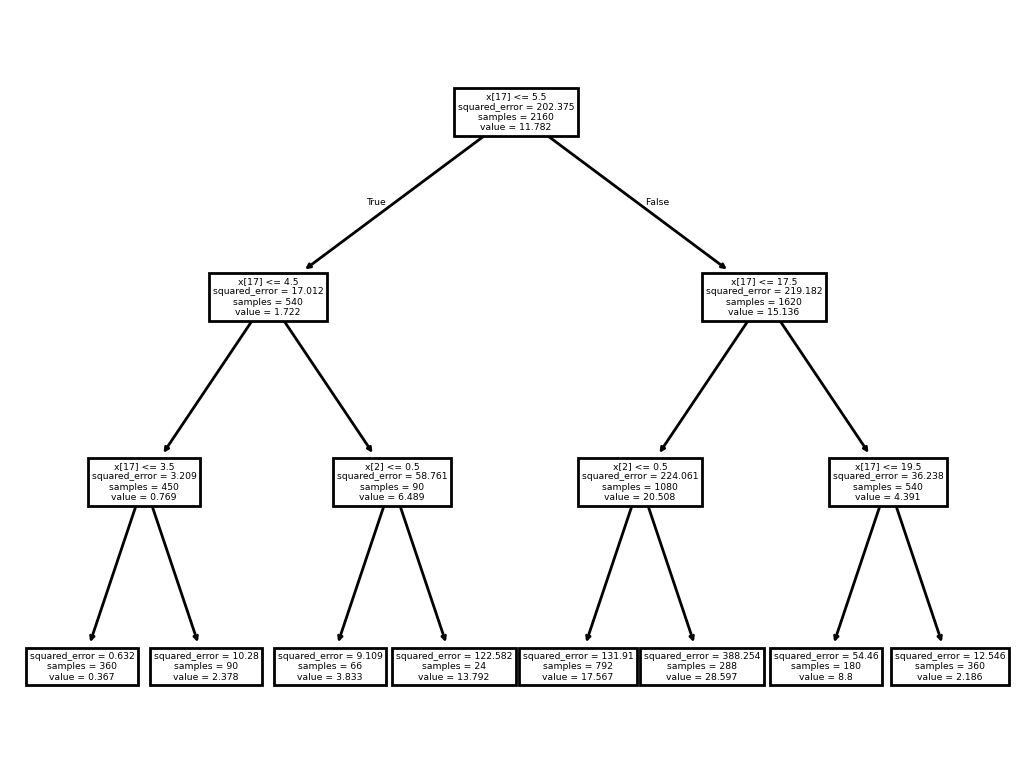

In [191]:
plt.figure(dpi=200)
plot_tree(reg)

C:\Users\hrdyj\AppData\Local\Temp\ipykernel_7556\3190188164.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


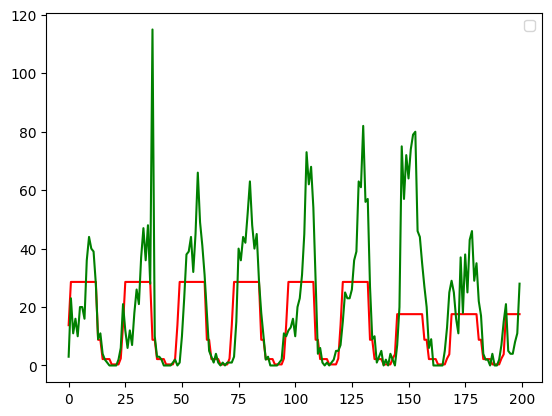

In [201]:
plt.plot(ypred[:200], color='red')
plt.plot(y_test[:200], color='green')
plt.legend()

In [209]:
df_vajan.iloc[:-24*90].iloc[125:150].month

235589    1
235576    1
235563    1
235229    1
235224    1
235218    1
235212    1
235202    1
235354    1
235348    1
235343    1
235338    1
235332    1
235326    1
235320    2
235294    2
235256    2
235474    2
235469    2
235463    2
235457    2
235414    2
235389    2
235365    2
235285    2
Name: month, dtype: int32

In [211]:
df_vajan.month.value_counts()

month
3     1488
5     1488
7     1488
8     1487
9     1440
6     1440
4     1440
2     1368
10    1055
1      883
12     744
11     720
Name: count, dtype: int64

In [212]:
from sklearn.ensemble import RandomForestRegressor

errs = []

for est in range(1, 100, 1):
    reg = RandomForestRegressor(max_depth=3, n_estimators=est)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    error = np.sqrt(np.mean((y_test - ypred) ** 2))
    errs.append(error)

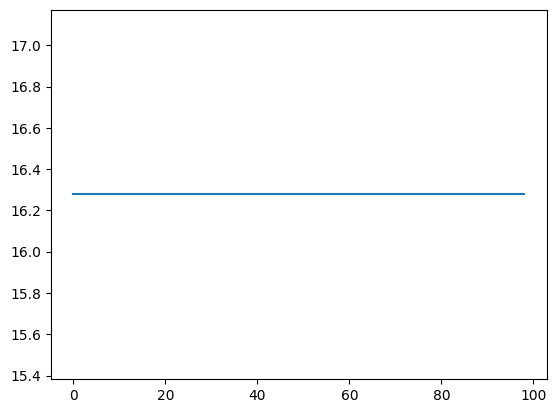

In [213]:
plt.plot(errs)

In [218]:
from sklearn.neighbors import KNeighborsRegressor

errs = []

reg = KNeighborsRegressor(n_neighbors=50)
reg.fit(X_train, y_train)
ypred = reg.predict(X_test)
error = np.sqrt(np.mean((y_test - ypred) ** 2))
errs.append(error)

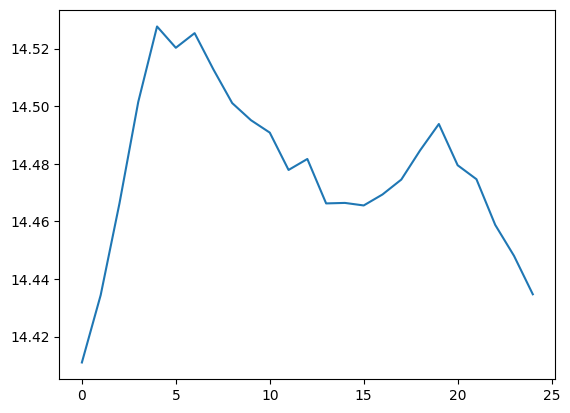

In [217]:
plt.plot(errs)

C:\Users\hrdyj\AppData\Local\Temp\ipykernel_7556\429363780.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


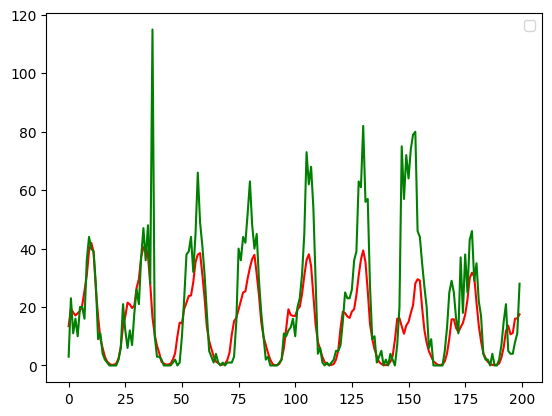

In [244]:
plt.plot(ypred[:200], color='red')
plt.plot(y_test[:200], color='green')
plt.legend()
knn_error = np.sqrt(((ypred[:200] - y_test[:200])**2).mean())

In [222]:
len(X_train.columns)

18

In [234]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=[64, 32, 16],
    activation="relu",
    batch_size=32,
    max_iter=100,
    learning_rate_init=0.001,
    verbose=True
)
nn.fit(X_train, y_train)

Iteration 1, loss = 128.05162320
Iteration 2, loss = 105.91813940
Iteration 3, loss = 101.20463177
Iteration 4, loss = 93.06416796
Iteration 5, loss = 81.75525146
Iteration 6, loss = 72.22509805
Iteration 7, loss = 65.42687665
Iteration 8, loss = 62.03204251
Iteration 9, loss = 59.68100449
Iteration 10, loss = 56.55480185
Iteration 11, loss = 54.51280653
Iteration 12, loss = 54.83595799
Iteration 13, loss = 51.75241415
Iteration 14, loss = 50.40413138
Iteration 15, loss = 49.78180463
Iteration 16, loss = 48.78465643
Iteration 17, loss = 47.91894801
Iteration 18, loss = 47.70206097
Iteration 19, loss = 47.03169934
Iteration 20, loss = 46.25691053
Iteration 21, loss = 45.61484114
Iteration 22, loss = 44.43968592
Iteration 23, loss = 43.96788832
Iteration 24, loss = 43.66654788
Iteration 25, loss = 43.42199708
Iteration 26, loss = 43.12146744
Iteration 27, loss = 42.35066938
Iteration 28, loss = 42.19639704
Iteration 29, loss = 41.74014313
Iteration 30, loss = 41.37475827
Iteration 31, lo

,loss,'squared_error'
,hidden_layer_sizes,"[64, 32, ...]"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True


In [235]:
preds = nn.predict(X_test)

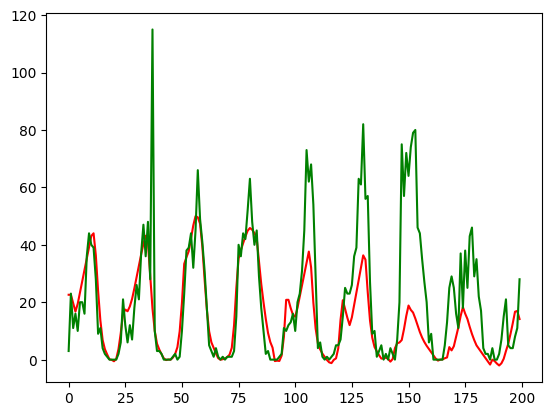

In [245]:
plt.plot(preds[:200], color='red')
plt.plot(y_test[:200], color='green')
nn_error = np.sqrt(((preds[:200] - y_test[:200])**2).mean())

In [246]:
knn_error, nn_error

(np.float64(16.189388129265417), np.float64(17.54021223701929))